<a href="https://colab.research.google.com/github/Saicharan39/Machine-Learning/blob/main/soil_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install tensorflow
!pip install keras

In [4]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,MaxPool2D,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
img_width,img_height=224,224
batch_size=32
epochs=50

In [6]:
path='/content/drive/MyDrive/Soil_Dataset'




In [7]:
train_data_dir='/content/drive/MyDrive/Soil_Dataset/Train'
test_data_dir='/content/drive/MyDrive/Soil_Dataset/Test'

In train data there are 4 subfolders

In [8]:
from glob import glob

# Specify the directory path in the Colab environment
directory_path = '/content/drive/MyDrive/Soil_Dataset/Train/*'

# Use glob to list all files in the directory
file_list = glob(directory_path)

# Count the number of files
num_files = len(file_list)

print(f'The number of files in the directory is: {num_files}')


The number of files in the directory is: 4


In [9]:
from glob import glob

# Specify the directory path in the Colab environment
directory_path = '/content/drive/MyDrive/Soil_Dataset/Train/Alluvial_Soil/*'

# Use glob to list all files in the directory
file_list = glob(directory_path)

# Count the number of files
num_files = len(file_list)

print(f'The number of files in the directory is: {num_files}')

The number of files in the directory is: 204


In [10]:
from glob import glob

# Specify the directory path in the Colab environment
directory_path = '/content/drive/MyDrive/Soil_Dataset/Train/Clay_Soil/*'

# Use glob to list all files in the directory
file_list = glob(directory_path)

# Count the number of files
num_files = len(file_list)

print(f'The number of files in the directory is: {num_files}')


The number of files in the directory is: 204


In [11]:

from glob import glob

glob('/content/drive/MyDrive/Soil_Dataset/Train/*')



['/content/drive/MyDrive/Soil_Dataset/Train/Alluvial_Soil',
 '/content/drive/MyDrive/Soil_Dataset/Train/Red_Soil',
 '/content/drive/MyDrive/Soil_Dataset/Train/Black_Soil',
 '/content/drive/MyDrive/Soil_Dataset/Train/Clay_Soil']

In [12]:
labels=['Alluvial_Soil','Black_Soil','Clay_Soil','Red_Soil']

In [13]:
def show_soil(path):
 im=cv2.imread(path)
 im_resized=cv2.resize(im,(img_height,img_width),interpolation=cv2.INTER_LINEAR)
 plt.imshow(cv2.cvtColor(im_resized,cv2.COLOR_BGR2RGB))
 plt.show()

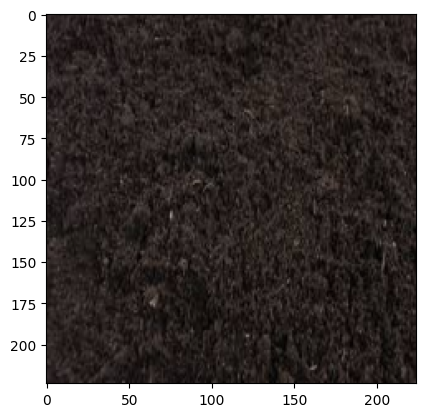

In [14]:
show_soil('/content/drive/MyDrive/Soil_Dataset/Test/Black_Soil/Black_5.jpg')

In [15]:

trainGen=ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)
testGen=ImageDataGenerator(rescale=1./255)



In [16]:
train=trainGen.flow_from_directory(train_data_dir,target_size=(img_height,img_width),classes=labels,class_mode='categorical',batch_size=batch_size,shuffle=True)
test=testGen.flow_from_directory(test_data_dir,target_size=(img_height,img_width),classes=labels,class_mode='categorical',batch_size=batch_size)


Found 816 images belonging to 4 classes.
Found 212 images belonging to 4 classes.


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.metrics import Precision, Recall

img_height = 224
img_width = 224

model = Sequential()

model.add(Conv2D(128, (3, 3), input_shape=(img_height, img_width, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))

# Compile the model with metrics
model.compile(loss='categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' if your labels are integers
              optimizer='adam',
              metrics=['accuracy', Precision(), Recall()])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 56, 56, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        1

f

In [18]:
epochs=50


model.fit(train,epochs=epochs,validation_data=test)

Epoch 1/50
26/26 [==============================] - 230s 9s/step - loss: 1.2029 - accuracy: 0.4681 - precision: 0.6547 - recall: 0.2463 - val_loss: 0.9155 - val_accuracy: 0.5094 - val_precision: 1.0000 - val_recall: 0.2217
Epoch 2/50
26/26 [==============================] - 143s 5s/step - loss: 0.6382 - accuracy: 0.7083 - precision: 0.8129 - recall: 0.5858 - val_loss: 0.4954 - val_accuracy: 0.8019 - val_precision: 0.8058 - val_recall: 0.7830
Epoch 3/50
26/26 [==============================] - 139s 5s/step - loss: 0.3832 - accuracy: 0.8456 - precision: 0.8546 - recall: 0.8358 - val_loss: 0.8668 - val_accuracy: 0.6604 - val_precision: 0.6699 - val_recall: 0.6509
Epoch 4/50
26/26 [==============================] - 139s 5s/step - loss: 0.4363 - accuracy: 0.8284 - precision: 0.8376 - recall: 0.8027 - val_loss: 0.3674 - val_accuracy: 0.8443 - val_precision: 0.8713 - val_recall: 0.8302
Epoch 5/50
26/26 [==============================] - 138s 5s/step - loss: 0.3114 - accuracy: 0.8738 - precisi

In [19]:
model.history.history.keys()


dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

In [20]:
train_loss=model.history.history['loss']
train_loss

[1.2028731107711792,
 0.638227641582489,
 0.3831656277179718,
 0.4362633526325226,
 0.3114071488380432,
 0.24052706360816956,
 0.2374754399061203,
 0.26025649905204773,
 0.22909218072891235,
 0.2288181483745575,
 0.2728259265422821,
 0.19790112972259521,
 0.17139466106891632,
 0.1774323433637619,
 0.20038889348506927,
 0.2706729769706726,
 0.17074054479599,
 0.1705102026462555,
 0.1948038935661316,
 0.16389679908752441,
 0.14095553755760193,
 0.12374196201562881,
 0.14363403618335724,
 0.13038213551044464,
 0.17372359335422516,
 0.12837396562099457,
 0.11669337749481201,
 0.10329306125640869,
 0.10634320229291916,
 0.11603926867246628,
 0.14607775211334229,
 0.11042489111423492,
 0.08940520882606506,
 0.08787954598665237,
 0.09402237832546234,
 0.07047200947999954,
 0.07487429678440094,
 0.06911217421293259,
 0.12026793509721756,
 0.07632507383823395,
 0.06021024286746979,
 0.0626186728477478,
 0.04327039048075676,
 0.059866372495889664,
 0.061241693794727325,
 0.08080478012561798,
 0.

In [21]:
train_acc=model.history.history['accuracy']
train_acc

[0.468137264251709,
 0.7083333134651184,
 0.845588207244873,
 0.8284313678741455,
 0.873774528503418,
 0.9129902124404907,
 0.9031862616539001,
 0.9154411554336548,
 0.9289215803146362,
 0.9093137383460999,
 0.8995097875595093,
 0.9215686321258545,
 0.9436274766921997,
 0.9436274766921997,
 0.9301470518112183,
 0.9019607901573181,
 0.938725471496582,
 0.938725471496582,
 0.9227941036224365,
 0.9522058963775635,
 0.9350489974021912,
 0.9485294222831726,
 0.9473039507865906,
 0.9534313678741455,
 0.9350489974021912,
 0.9534313678741455,
 0.9558823704719543,
 0.9632353186607361,
 0.9595588445663452,
 0.9534313678741455,
 0.9411764740943909,
 0.9620097875595093,
 0.969362735748291,
 0.9620097875595093,
 0.9595588445663452,
 0.9767156839370728,
 0.9742646813392639,
 0.969362735748291,
 0.9632353186607361,
 0.9730392098426819,
 0.9718137383460999,
 0.9791666865348816,
 0.9816176295280457,
 0.9791666865348816,
 0.970588207244873,
 0.970588207244873,
 0.9779411554336548,
 0.9791666865348816,
 

In [22]:
test_loss=model.history.history['val_loss']
test_loss

[0.9155186414718628,
 0.49539047479629517,
 0.8667512536048889,
 0.36740681529045105,
 0.42710646986961365,
 0.321232408285141,
 0.29822054505348206,
 0.2650047838687897,
 0.31893157958984375,
 0.8130286335945129,
 0.4703642427921295,
 0.25121796131134033,
 0.2639724910259247,
 0.25020915269851685,
 0.31404441595077515,
 0.30811116099357605,
 0.41626182198524475,
 0.23069390654563904,
 0.2601470351219177,
 0.3967212736606598,
 0.25666433572769165,
 0.2291027307510376,
 0.24314658343791962,
 0.32116109132766724,
 0.26205214858055115,
 0.288208931684494,
 0.20972007513046265,
 0.22688192129135132,
 0.42641979455947876,
 0.27031728625297546,
 0.19506525993347168,
 0.19334962964057922,
 0.2642146050930023,
 0.3321550488471985,
 0.3901805281639099,
 0.30622830986976624,
 0.2183016985654831,
 0.22156810760498047,
 0.2486644983291626,
 0.2343408763408661,
 0.21694767475128174,
 0.26704394817352295,
 0.337946355342865,
 0.32649141550064087,
 0.38279151916503906,
 0.19834712147712708,
 0.283400

In [23]:
test_acc=model.history.history['val_accuracy']
test_acc

[0.5094339847564697,
 0.801886796951294,
 0.6603773832321167,
 0.8443396091461182,
 0.8726415038108826,
 0.8820754885673523,
 0.9056603908538818,
 0.9198113083839417,
 0.9103773832321167,
 0.7924528121948242,
 0.8584905862808228,
 0.9339622855186462,
 0.9150943160057068,
 0.9056603908538818,
 0.8773584961891174,
 0.9056603908538818,
 0.8820754885673523,
 0.8867924809455872,
 0.8962264060974121,
 0.8349056839942932,
 0.9198113083839417,
 0.9056603908538818,
 0.9056603908538818,
 0.9056603908538818,
 0.8962264060974121,
 0.8867924809455872,
 0.9103773832321167,
 0.9292452931404114,
 0.8962264060974121,
 0.9150943160057068,
 0.9198113083839417,
 0.9198113083839417,
 0.9198113083839417,
 0.9103773832321167,
 0.9056603908538818,
 0.9103773832321167,
 0.9198113083839417,
 0.9198113083839417,
 0.9245283007621765,
 0.9292452931404114,
 0.9292452931404114,
 0.9198113083839417,
 0.9103773832321167,
 0.9103773832321167,
 0.9150943160057068,
 0.9386792182922363,
 0.9245283007621765,
 0.93396228551

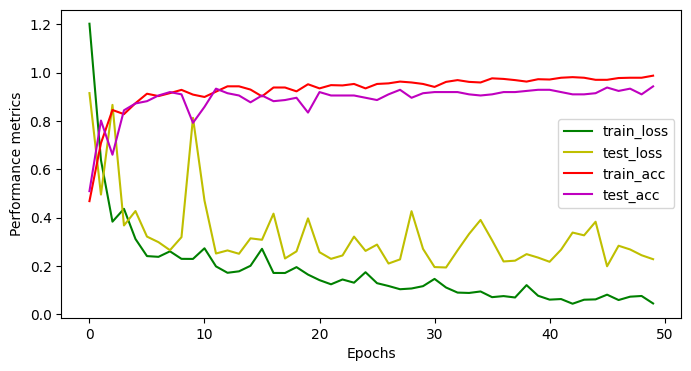

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming epochs is defined somewhere in your code
epochs = 50

# Assuming train_loss, test_loss, train_acc, and test_acc are defined somewhere in your code
# Ensure they have the same length as the number of epochs
train_loss = train_loss[:epochs]
test_loss = test_loss[:epochs]
train_acc = train_acc[:epochs]
test_acc = test_acc[:epochs]

plt.figure(figsize=(8, 4))
plt.plot(np.arange(epochs), train_loss, color='g', label='train_loss')
plt.plot(np.arange(epochs), test_loss, color='y', label='test_loss')
plt.plot(np.arange(epochs), train_acc, color='r', label='train_acc')
plt.plot(np.arange(epochs), test_acc, color='m', label='test_acc')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Performance metrics')

plt.show()



In [25]:
acc= model.evaluate(test)
print('Test accuracy:', acc)
#print('Test Acc:', acc)




7/7 [==============================] - 10s 1s/step - loss: 0.2277 - accuracy: 0.9434 - precision: 0.9479 - recall: 0.9434
Test accuracy: [0.22770312428474426, 0.9433962106704712, 0.9478672742843628, 0.9433962106704712]


Prediction System


1/1 [==============================] - 0s 48ms/step


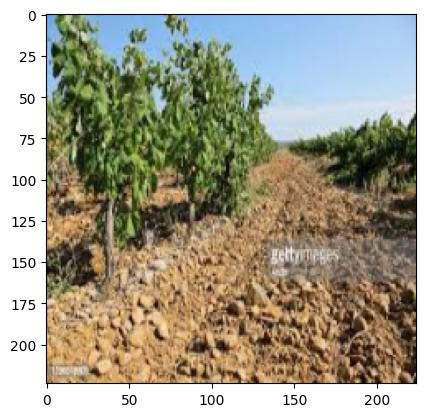

Predicted Class: Alluvial_Soil
Probability: 1.0


In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

def predict_soil_function(path, model, class_labels, img_height=224, img_width=224):
    # Load and preprocess the image
    img = image.load_img(path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img = np.expand_dims(img_array, axis=0)

    # Make predictions
    predictions = model.predict(img)
    predicted_class_index = np.argmax(predictions)
    predicted_probability = predictions[0][predicted_class_index]

    # Display the image
    im_resized = cv2.resize(cv2.imread(path), (img_height, img_width), interpolation=cv2.INTER_LINEAR)
    plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
    plt.show()

    # Print predicted class and its probability
    predicted_class = class_labels[predicted_class_index]
    print('Predicted Class:', predicted_class)
    print('Probability:', predicted_probability)

    return predicted_class, predicted_probability

# Assuming you already have the 'model' loaded and class labels defined
# model = ...
class_labels = ['Alluvial_Soil', 'Black_Soil', 'Clay_Soil', 'Red_Soil']

predict_soil_variable = '/content/drive/MyDrive/Soil_Dataset/Test/Alluvial_Soil/images81.jpg'
predicted_class, predicted_probability = predict_soil_function(predict_soil_variable, model, class_labels)



1/1 [==============================] - 0s 109ms/step


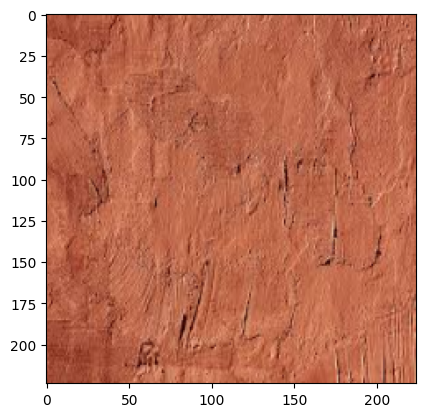

Predicted Class and Probability:
Alluvial_Soil: 0.0000
Black_Soil: 0.0000
Clay_Soil: 0.0000
Red_Soil: 1.0000

Predicted Class: Red_Soil
Probability: 1.0


In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

def predict_soil_function(path, model, class_labels, img_height=224, img_width=224):
    # Load and preprocess the image
    img = image.load_img(path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img = np.expand_dims(img_array, axis=0)

    # Make predictions
    predictions = model.predict(img)
    predicted_class_index = np.argmax(predictions)
    predicted_probability = predictions[0][predicted_class_index]

    # Display the image
    im_resized = cv2.resize(cv2.imread(path), (img_height, img_width), interpolation=cv2.INTER_LINEAR)
    plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
    plt.show()

    # Print predicted class and its probability
    print('Predicted Class and Probability:')
    for i, class_label in enumerate(class_labels):
        probability = predictions[0][i]
        print(f'{class_label}: {probability:.4f}')

    predicted_class = class_labels[predicted_class_index]
    print('\nPredicted Class:', predicted_class)
    print('Probability:', predicted_probability)

    return predicted_class, predicted_probability

# Assuming you already have the 'model' loaded and class labels defined
# model = ...
class_labels = ['Alluvial_Soil', 'Black_Soil', 'Clay_Soil', 'Red_Soil']

predict_soil_variable = '/content/drive/MyDrive/Soil_Dataset/Test/Red_Soil/Red_22.jpg'
predicted_class, predicted_probability = predict_soil_function(predict_soil_variable, model, class_labels)


1/1 [==============================] - 0s 52ms/step


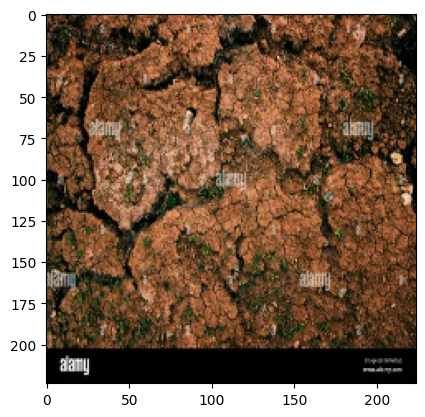

Predicted Class and Probability:
Alluvial_Soil: 0.0000
Black_Soil: 0.0000
Clay_Soil: 1.0000
Red_Soil: 0.0000

Predicted Class: Clay_Soil
Probability: 1.0


In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

def predict_soil_function(path, model, class_labels, img_height=224, img_width=224):
    # Load and preprocess the image
    img = image.load_img(path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img = np.expand_dims(img_array, axis=0)

    # Make predictions
    predictions = model.predict(img)
    predicted_class_index = np.argmax(predictions)
    predicted_probability = predictions[0][predicted_class_index]

    # Display the image
    im_resized = cv2.resize(cv2.imread(path), (img_height, img_width), interpolation=cv2.INTER_LINEAR)
    plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
    plt.show()

    # Print predicted class and its probability
    print('Predicted Class and Probability:')
    for i, class_label in enumerate(class_labels):
        probability = predictions[0][i]
        print(f'{class_label}: {probability:.4f}')

    predicted_class = class_labels[predicted_class_index]
    print('\nPredicted Class:', predicted_class)
    print('Probability:', predicted_probability)

    return predicted_class, predicted_probability

# Assuming you already have the 'model' loaded and class labels defined
# model = ...
class_labels = ['Alluvial_Soil', 'Black_Soil', 'Clay_Soil', 'Red_Soil']

predict_soil_variable = '/content/clay.jpg'
predicted_class, predicted_probability = predict_soil_function(predict_soil_variable, model, class_labels)
